### Here we study the photometry noise based on the GAMA catalog

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import Table
import torch
import corner
import os

In [64]:
os.chdir('/scratch/gpfs/jiaxuanl/Data/popsed/')

In [65]:
import sys
sys.path.append('/home/jiaxuanl/Research/popsed/')
from popsed.utils import flux2mag, mag2flux, sigma_flux2mag, sigma_mag2flux

In [66]:
gama_cat = Table.read('./reference_catalog/GAMA/DR3ApMatchPhotStellarMass.fits')

In [67]:
filters = list('ugrizYJHK')

In [68]:
mags = np.vstack([gama_cat[col].data for col in [f'MAG_AUTO_{filt}' for filt in list('ugrizYJHK')]]).T
mags_err = np.vstack([gama_cat[col].data for col in [f'MAGERR_AUTO_{filt}' for filt in list('ugrizYJHK')]]).T

In [69]:
len(gama_cat)

120739

In [70]:
flag = np.all((mags != 99.0), axis=1) & np.all((mags != -9999.0), axis=1) & np.all((mags != -99.0), axis=1) 
flag &= (mags[:, 2] < 19.65) & ((mags[:, 6] - mags[:, 8]) > 0.025)
flag &= (gama_cat['Z'] < 0.6) & (gama_cat['Z'] > 0)

(array([1.3018e+04, 2.0608e+04, 2.4729e+04, 1.8918e+04, 1.8888e+04,
        2.0540e+03, 1.0080e+03, 1.4200e+02, 3.1000e+01, 1.3000e+01]),
 array([18. , 18.4, 18.8, 19.2, 19.6, 20. , 20.4, 20.8, 21.2, 21.6, 22. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

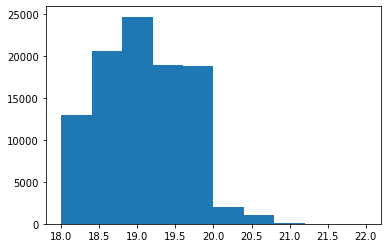

In [71]:
plt.hist(mags[:, 2], range=(18, 22))

In [72]:
np.sum(flag)

87189

In [73]:
gama_cat = gama_cat[flag]

In [74]:
len(gama_cat)

87189

(array([4.2000e+01, 8.1000e+01, 1.9000e+02, 7.0800e+02, 2.8062e+04,
        5.6847e+04, 6.1900e+02, 2.1700e+02, 1.2200e+02, 8.9000e+01]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

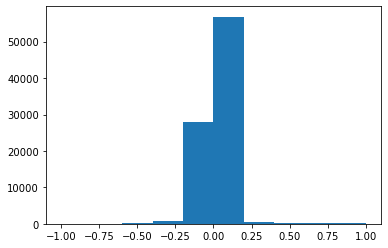

In [75]:
plt.hist(np.log10(gama_cat['fluxscale']), range=(-1, 1))

(7.0, 12.0)

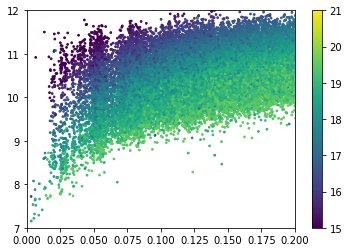

In [76]:
plt.scatter(gama_cat['Z'], gama_cat['logmintsfh'], c=gama_cat['MAG_AUTO_r'], 
            s=3, vmin=15, vmax=21)
plt.colorbar()

plt.xlim(0, 0.2)
plt.ylim(7, 12)

In [77]:
gama_cat.colnames

['CATAID',
 'OBJID',
 'RA',
 'DEC',
 'X',
 'Y',
 'ALPHA_J2000',
 'DELTA_J2000',
 'A_IMAGE',
 'B_IMAGE',
 'ERRA_IMAGE',
 'ERRB_IMAGE',
 'KRON_RADIUS',
 'PETRO_RADIUS',
 'THETA_IMAGE',
 'THETA_J2000',
 'ERRTHETA_J2000',
 'THRESHOLD',
 'MU_THRESHOLD',
 'ISOAREAF_IMAGE',
 'FLUX_AUTO_u',
 'FLUXERR_AUTO_u',
 'MAG_AUTO_u',
 'MAGERR_AUTO_u',
 'FLUX_PETRO_u',
 'FLUXERR_PETRO_u',
 'MAG_PETRO_u',
 'MAGERR_PETRO_u',
 'BACKGROUND_u',
 'FLUX_MAX_u',
 'ISOAREA_IMAGE_u',
 'MU_MAX_u',
 'FWHM_IMAGE_u',
 'FLAGS_u',
 'FLUX_AUTO_g',
 'FLUXERR_AUTO_g',
 'MAG_AUTO_g',
 'MAGERR_AUTO_g',
 'FLUX_PETRO_g',
 'FLUXERR_PETRO_g',
 'MAG_PETRO_g',
 'MAGERR_PETRO_g',
 'BACKGROUND_g',
 'FLUX_MAX_g',
 'ISOAREA_IMAGE_g',
 'MU_MAX_g',
 'FWHM_IMAGE_g',
 'FLAGS_g',
 'FLUX_AUTO_r',
 'FLUXERR_AUTO_r',
 'MAG_AUTO_r',
 'MAGERR_AUTO_r',
 'FLUX_PETRO_r',
 'FLUXERR_PETRO_r',
 'MAG_PETRO_r',
 'MAGERR_PETRO_r',
 'BACKGROUND_r',
 'FLUX_MAX_r',
 'ISOAREA_IMAGE_r',
 'MU_MAX_r',
 'FWHM_IMAGE_r',
 'FLAGS_r',
 'FLUX_AUTO_i',
 'FLUXERR_AUTO

(8.0, 12.5)

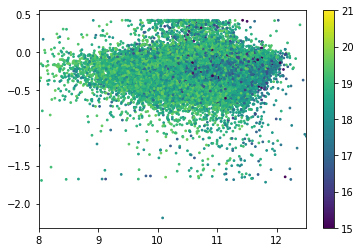

In [78]:
plt.scatter(gama_cat['logmintsfh'], np.log10(gama_cat['metal'] / 0.019), c=mags[flag][:, 2],
            s=3, vmin=15, vmax=21)
plt.colorbar()

plt.xlim(8, 12.5)

In [79]:
z_mass_met = np.vstack([gama_cat['Z'], gama_cat['logmintsfh'], np.log10(gama_cat['metal']) - np.log10(0.0190)]).T

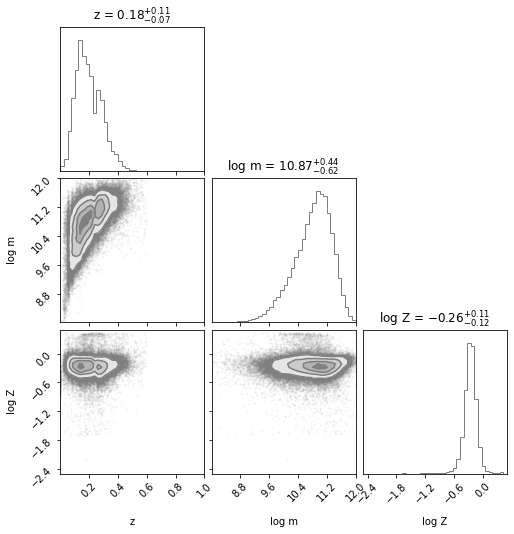

In [80]:
figure = corner.corner(z_mass_met, 
#                        fig=figure,
                  labels=['z', 'log m', 'log Z'], bins=40,
                  color='gray', #quantiles=[0.16, 0.5, 0.84], 
                  smooth=0.2, fill_contours=True,
                       range=[[0, 1], [8, 12], [-2.5, 0.5]], 
                  show_titles=True, title_kwargs={"fontsize": 12}, 
                        hist_kwargs={'density': True}, plot_datapoints=True)

In [81]:
mags = mags[flag]
mags_err = mags_err[flag]

In [82]:
np.save('./reference_catalog/GAMA/gama_clean_mag_dr3_apmatch.npy', mags)

In [83]:
np.save('./reference_catalog/GAMA/gama_clean_z_mass_dr3_apmatch.npy', 
        np.vstack([gama_cat['Z'], gama_cat['logmintsfh']]).T)

---

### Noise model

`sigs` is defined as $\Delta f$ or $\Delta m$

In [56]:
sigs = mags_err

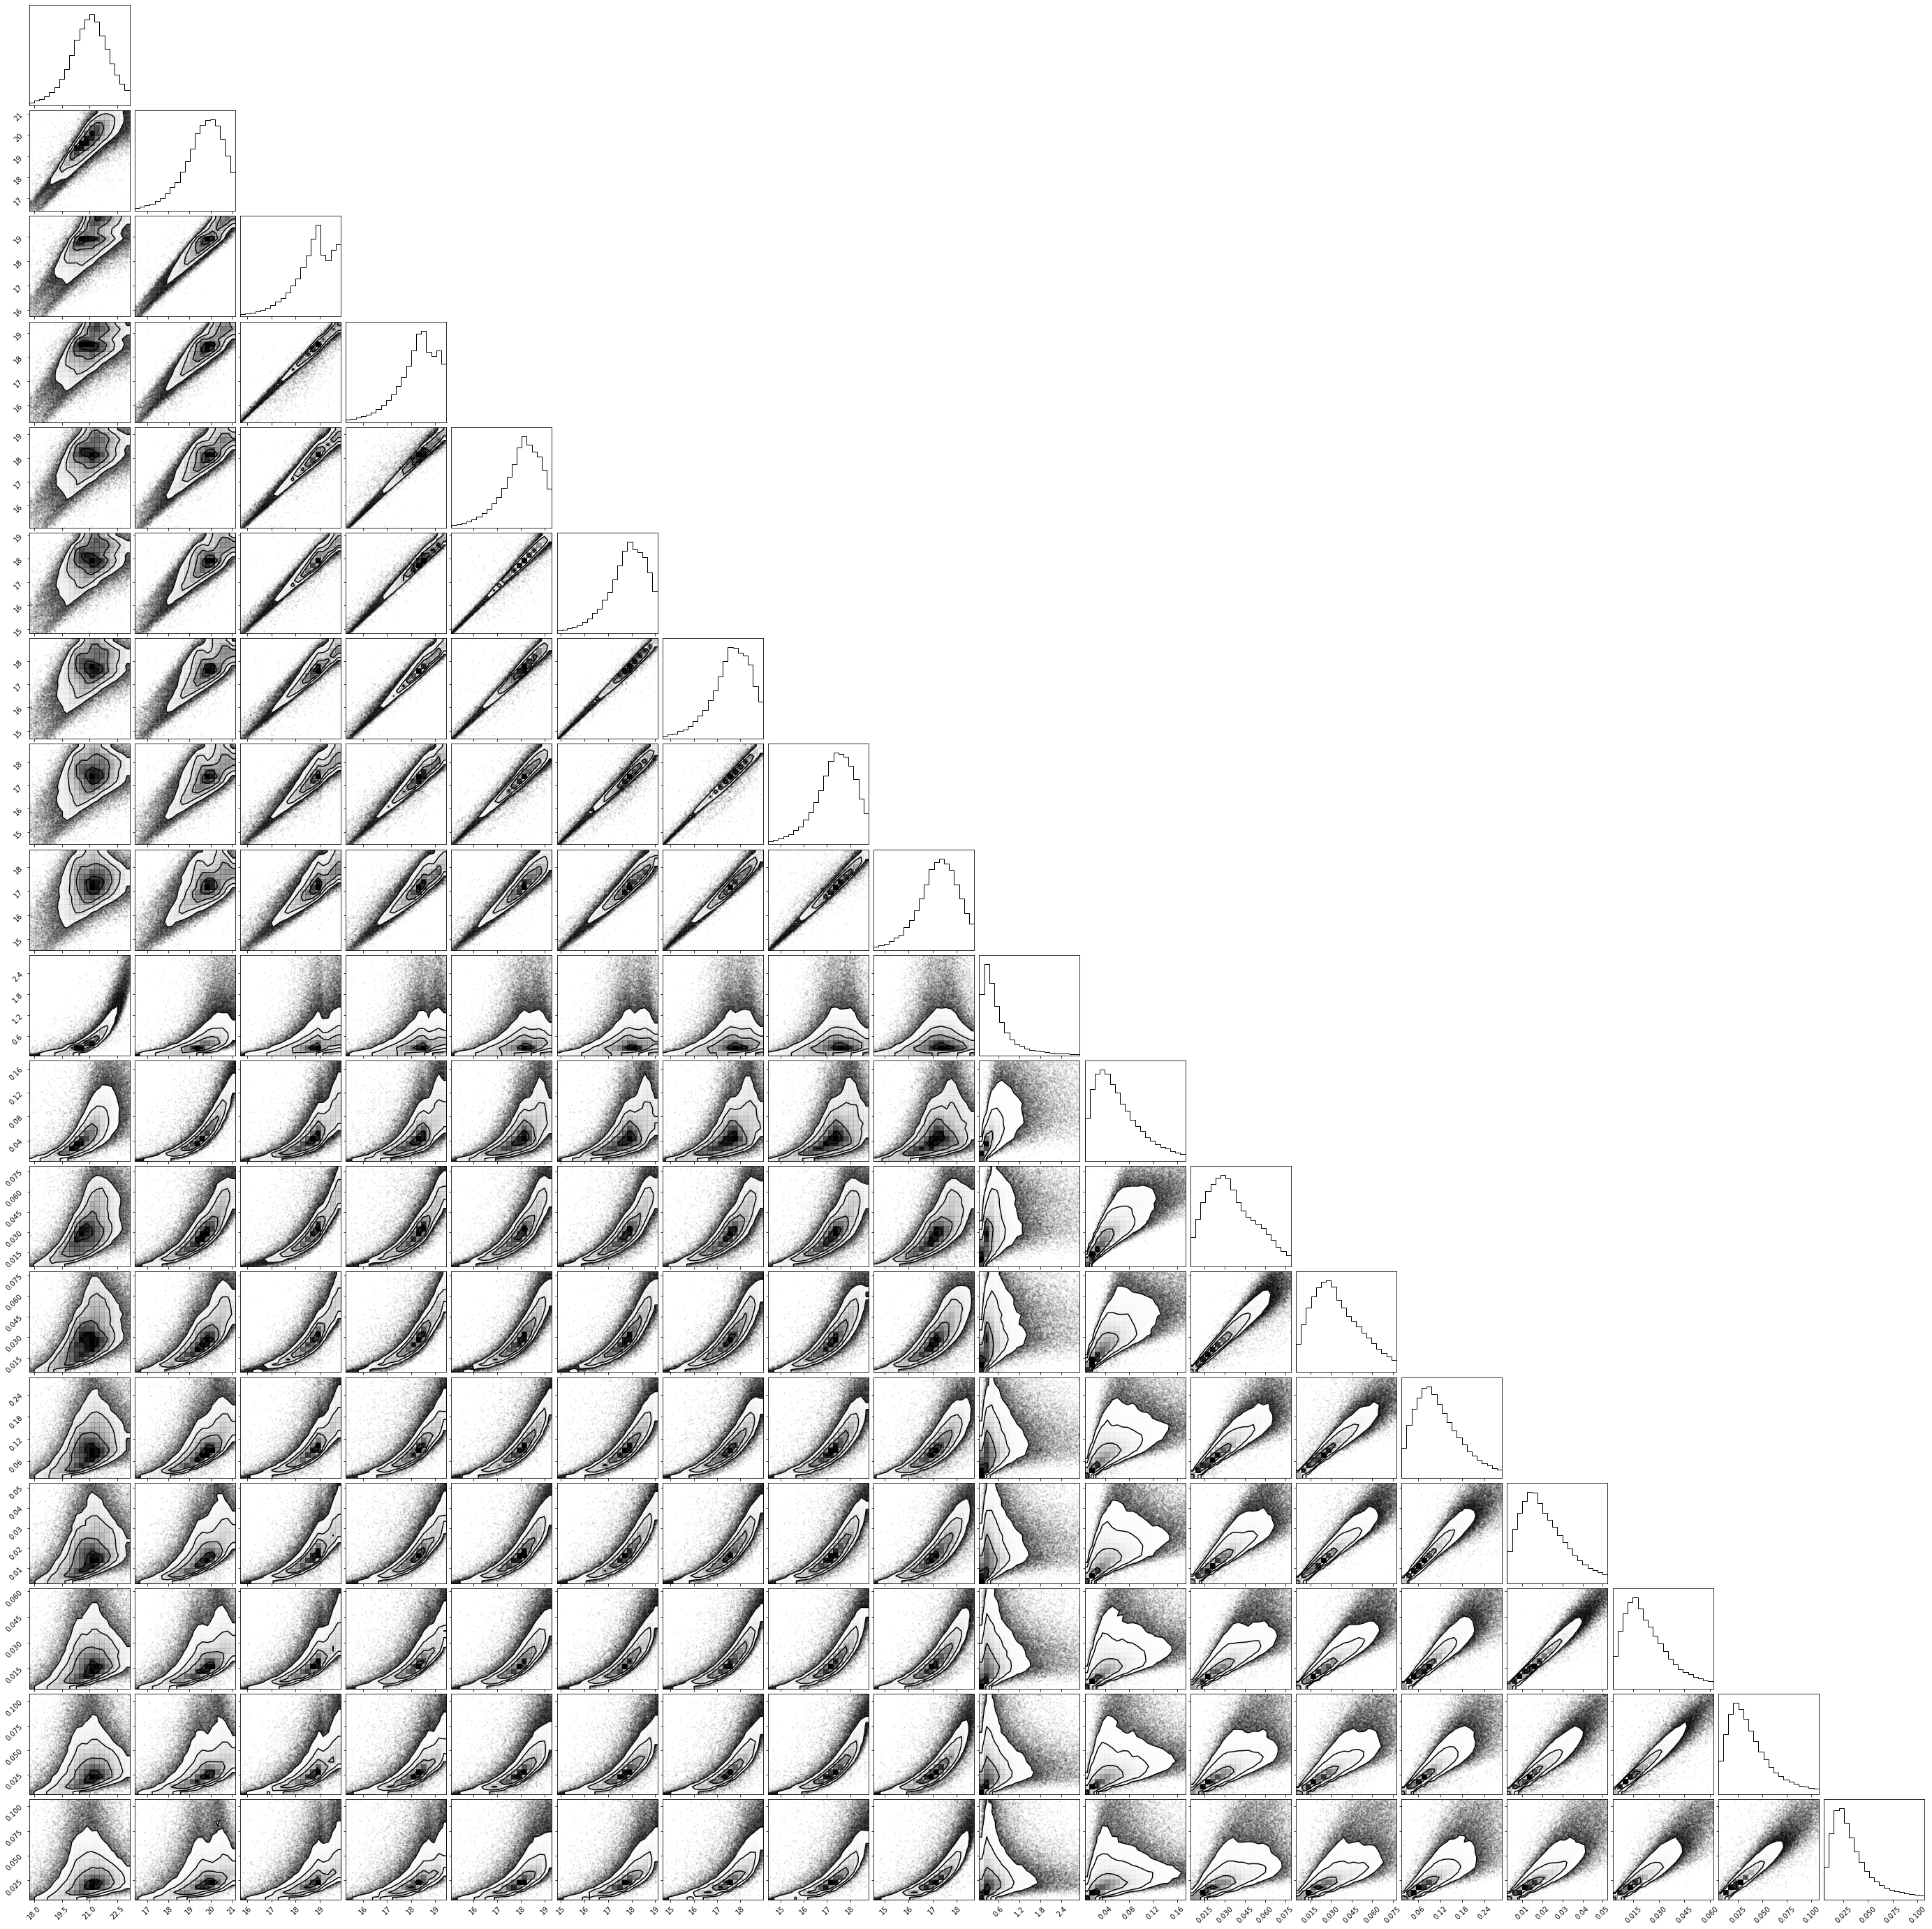

In [57]:
fig = corner.corner(np.concatenate([mags, sigs], axis=1), 
                    range=np.nanquantile(
                     np.concatenate([mags, sigs], axis=1), 
                     [0.01, 0.95], axis=0).T) 

In [58]:
from scipy.stats import binned_statistic
from scipy.interpolate import interp1d

In [59]:
def trimmed_median(x): 
    xlim = np.quantile(x, [0.0, 0.99])
    return np.median(x[(x > xlim[0]) & (x < xlim[1])])

def trimmed_std(x): 
    xlim = np.quantile(x, [0.0, 0.99])
    return np.std(x[(x > xlim[0]) & (x < xlim[1])])

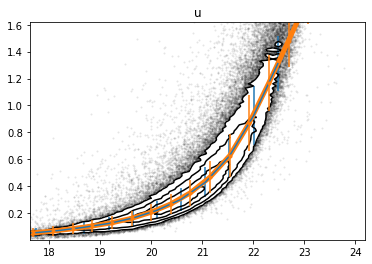

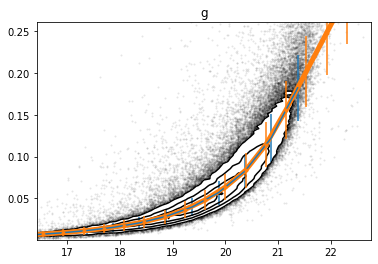

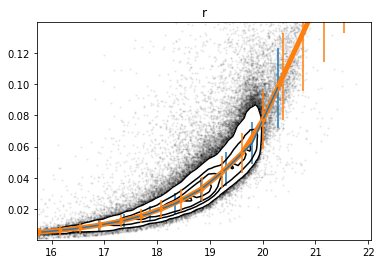

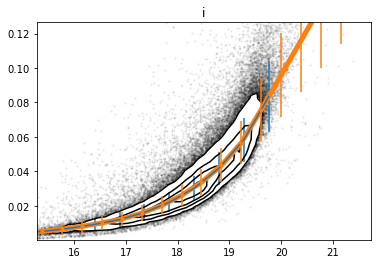

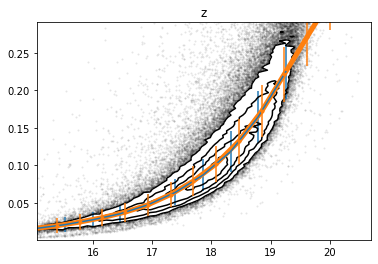

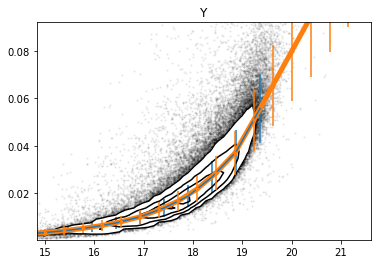

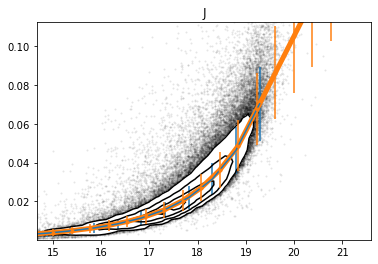

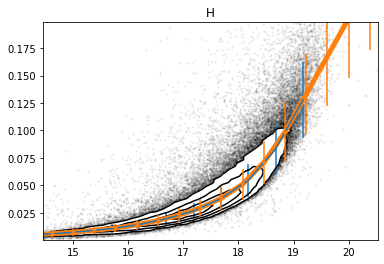

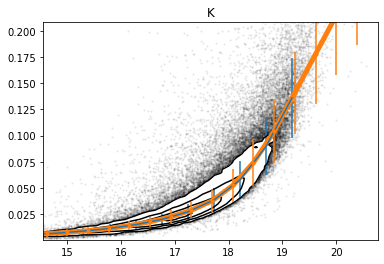

In [60]:
meds_sigs, stds_sigs = [], [] 

# for i in range(len(filters)): 
for i in range(len(filters)): 
    clean = (np.isfinite(mags[:,i]) & (sigs[:,i] < np.max([np.quantile(sigs[:,i], 0.9), 0.3])))

    med_sig, mags_edges, _ = binned_statistic(mags[clean,i], sigs[clean,i], statistic=trimmed_median, 
                                              range=np.nanquantile(mags[clean,i], [0., 0.995]), bins=20)
    std_sig, mags_edges, _ = binned_statistic(mags[clean,i], sigs[clean,i], statistic=trimmed_std, 
                                              range=np.nanquantile(mags[clean,i], [0., 0.995]), bins=20)
    
    finite = (np.isfinite(med_sig) & np.isfinite(std_sig))
    meds_sigs.append(interp1d(0.5*(mags_edges[1:] + mags_edges[:-1])[finite], med_sig[finite], 
                              fill_value='extrapolate'))
    stds_sigs.append(interp1d(0.5*(mags_edges[1:] + mags_edges[:-1])[finite], std_sig[finite], 
                              fill_value='extrapolate'))
    
    fig = plt.figure(figsize=(6,4))
    sub = fig.add_subplot(111)
    sub.plot(0.5*(mags_edges[1:] + mags_edges[:-1]), med_sig, c='C0')
    sub.errorbar(0.5*(mags_edges[1:] + mags_edges[:-1]), med_sig,
                 yerr=std_sig, c='C0')
    corner.hist2d(mags[clean,i], sigs[clean,i], plot_density=False, bins=100, ax=sub)
    
    sub.plot(np.linspace(10, 25, 40), meds_sigs[-1](np.linspace(10, 25, 40)), c='C1', lw=5)
    sub.errorbar(np.linspace(10, 25, 40), meds_sigs[-1](np.linspace(10, 25, 40)), 
                 yerr=stds_sigs[-1](np.linspace(10, 25, 40)), fmt='.C1')
    sub.set_xlim(np.nanquantile(mags[clean,i], [0.01, 1.]))
    sub.set_ylim(np.nanquantile(sigs[clean,i], [0.0, 0.995]))
    
    sub.set_title(filters[i])

In [61]:
np.save('./noise_model/gama_noise_model_mag_dr3_apmatch.npy', np.vstack([meds_sigs, stds_sigs]))